<a href="https://colab.research.google.com/github/noemicopalcua7/InmersiondeDatos_Colab_Phyton/blob/main/INMERSION_DATOS_AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')

In [3]:
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
2000,Casa,Casa en venta en Tintala,4,2,72,Tintala,Tintala,$ 220.000.000
9450,Casa,Casa en venta en Kennedy,5,4,261,Kennedy,Kennedy Central,$ 430.000.000
8234,Apartamento,Apartamento en venta en Bosa,3,2,51,Bosa,Bosa Central,$ 135.000.000
6859,Casa,Casa en venta en Bosa,7,4,240,Bosa,Bosa Central,$ 450.000.000
8339,Apartamento,Apartamento en venta en Cedritos,2,2,69,Cedritos,Usaquén,$ 440.000.000
144,Apartamento,Apartamento en venta en Cedritos,2,2,69,Cedritos,Usaquén,$ 400.000.000
719,Apartamento,Apartamento en venta en Cedritos,1,2,71,Cedritos,Usaquén,$ 394.500.000
1121,Apartamento,Apartamento en venta en La Calleja,3,2,91,La Calleja,USAQUÉN: Country Club + Santa Bárbara,$ 480.000.000
6960,Casa,Casa en venta en La Sabana,3,3,126,La Sabana,La Sabana,$ 170.000.000
4981,Apartamento,Apartamento en venta en Chico Norte,1,1,68,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 743.710.000


In [5]:
columnas = {'Baños':'Banos', 'Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2502,Apartamento,Apartamento en venta en Las Nieves,1,2,57,Las Nieves,SANTA FE: Las Nieves + Sagrado Corazón,$ 230.000.000
9491,Apartamento,Apartamento en venta en Madelena,3,2,54,Madelena,Arborizadora,$ 178.000.000
4961,Apartamento,Apartamento en venta en Barrios Unidos,2,1,44,Barrios Unidos,Los Andes,$ 144.000.000


In [6]:
valor = inmuebles.Valor.str.split(expand = True)
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.', '', regex = True)

In [7]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [8]:
inmuebles[['Tipo', 'Precio_Millon']].sort_values('Precio_Millon', ascending = True).head(3)

,Tipo,Precio_Millon
4847,Oficina/Consultorio,60.0
4844,Oficina/Consultorio,74.3
9173,Apartamento,79.0


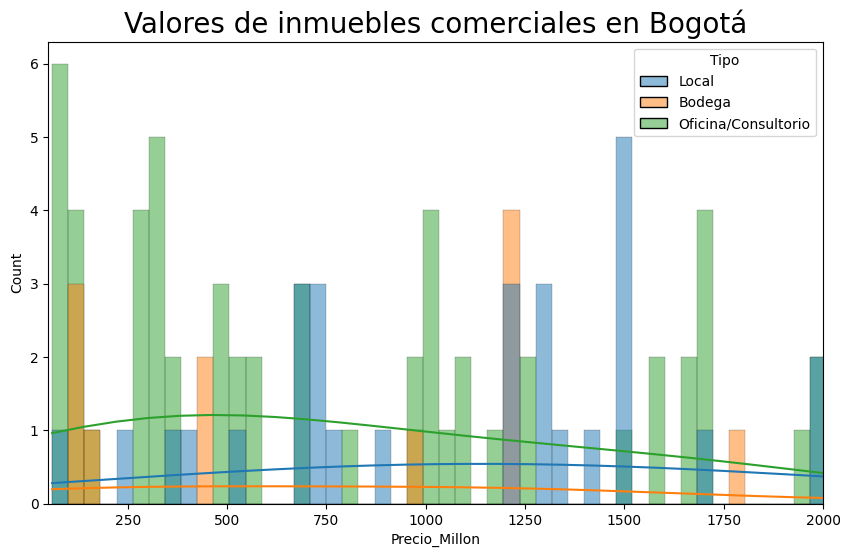

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
grafica_tipos = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue = 'Tipo', hue_order=['Local','Bodega','Oficina/Consultorio'])
grafica_tipos.set_title('Valores de inmuebles comerciales en Bogotá', fontsize= 20)
plt.xlim((50,2000))
plt.show
plt.savefig('/content/drive/MyDrive/INMERSION_DATOS/valoresinmueblescomerciales')

In [10]:
inmuebles['Precio_Mtro2'] = inmuebles.Precio_Millon / inmuebles.Area
inmuebles.Precio_Mtro2

0       5.142857
1       3.941176
2       7.777778
3       5.779221
4       7.578125
          ...   
9515    4.142857
9516    6.700000
9517    2.349869
9518    1.830601
9519    2.788269
Name: Precio_Mtro2, Length: 9520, dtype: float64

In [11]:
inmuebles[['Precio_Mtro2','Barrio','Area', 'Tipo']].sort_values('Precio_Mtro2', ascending = False).head(3)

,Precio_Mtro2,Barrio,Area,Tipo
8401,90.0,San Cristobal,2,Apartamento
9256,40.0,Rafael Uribe Uribe,5,Apartamento
9297,38.0,Usaquén,50,Casa


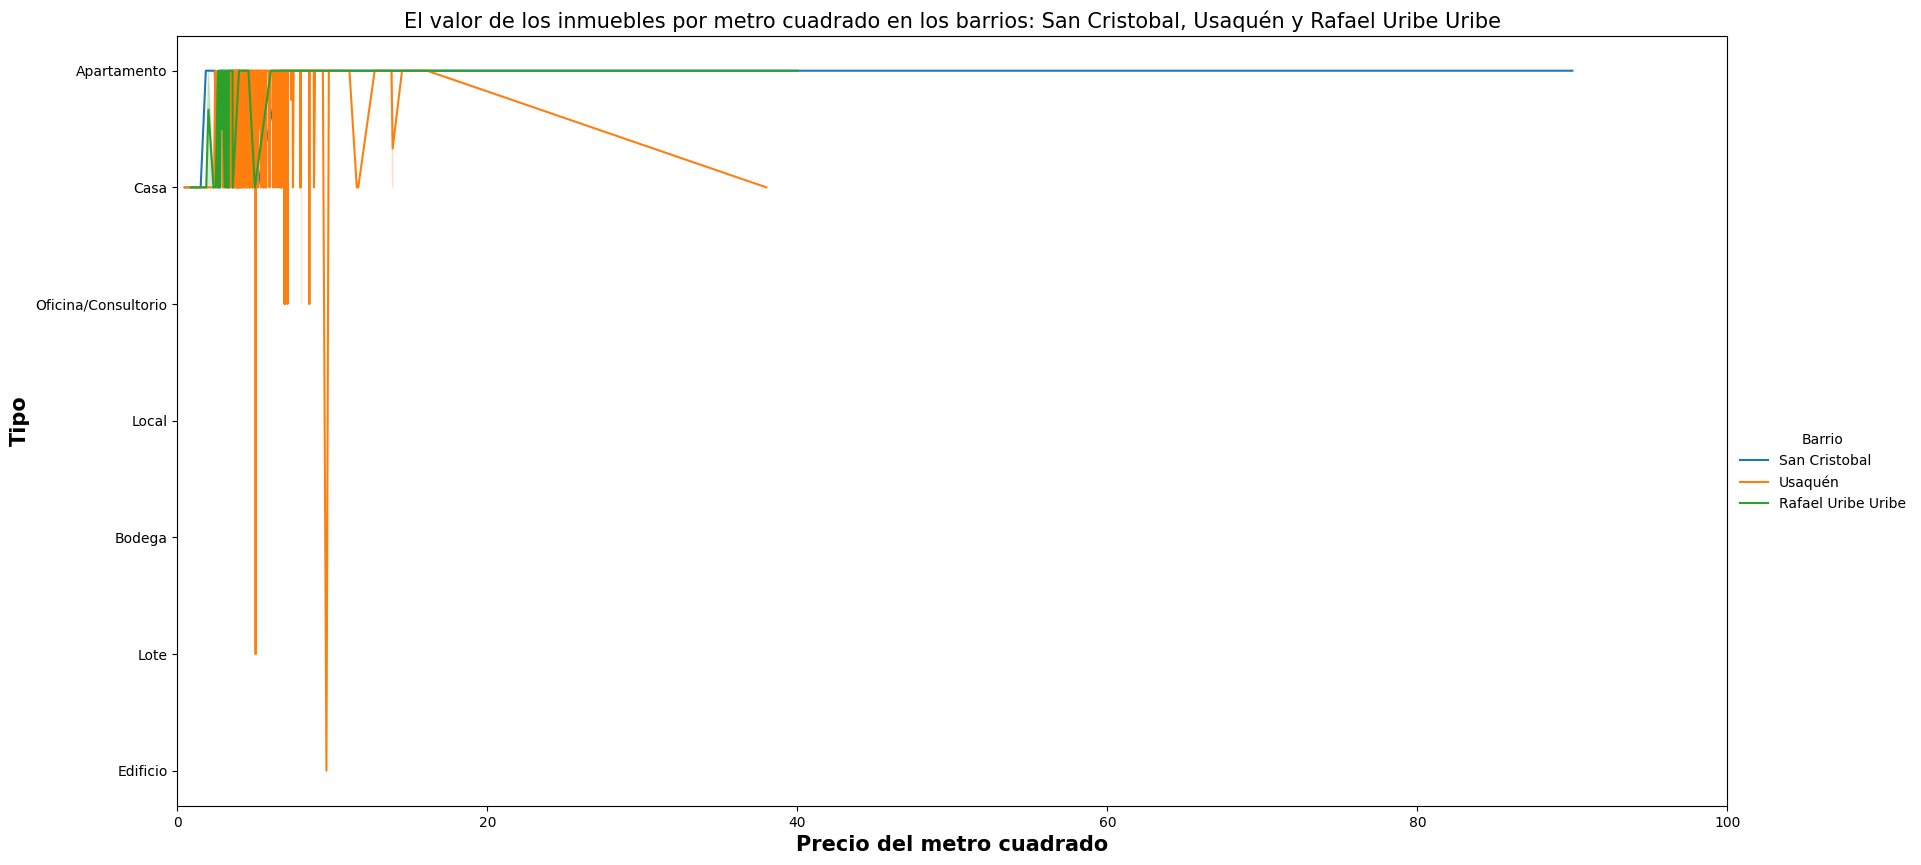

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
g = sns.lineplot(data = inmuebles,x = 'Precio_Mtro2',y = 'Tipo', hue = 'Barrio', hue_order= ['San Cristobal', 'Usaquén', 'Rafael Uribe Uribe'])
sns.move_legend(g, 'upper left', bbox_to_anchor=(1,.5), ncol =1, frameon = False)
plt.xlim(0,100)
g.set_title('El valor de los inmuebles por metro cuadrado en los barrios: San Cristobal, Usaquén y Rafael Uribe Uribe', fontsize= 15)
plt.ylabel('Tipo', fontsize=15, color='black', fontweight='bold')
plt.xlabel('Precio del metro cuadrado', fontsize=15, color='black', fontweight='bold')
plt.savefig('/content/drive/MyDrive/INMERSION_DATOS/grafica_valor_metrocuadrado_barrio_1')

In [14]:
inmuebles.loc[inmuebles.Barrio == 'Usaquén'].sort_values('Precio_Mtro2', ascending = True).head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Millon,Precio_Mtro2
9026,Casa,Casa en venta en Usaquén,3,4,6364,Usaquén,Usaquén,$ 3.000.000.000,3000000000,3000.0,0.471402
8161,Casa,Casa en venta en Usaquén,11,6,250,Usaquén,Usaquén,$ 450.000.000,450000000,450.0,1.800000
4672,Casa,Casa en venta en Usaquén,3,4,1200,Usaquén,Usaquén,$ 2.200.000.000,2200000000,2200.0,1.833333


In [15]:
inmuebles.loc[inmuebles.Barrio == 'San Cristobal'].sort_values('Precio_Mtro2', ascending = False).head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Millon,Precio_Mtro2
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180000000,180.0,90.000000
3265,Apartamento,Apartamento en venta en San Cristobal,2,2,73,San Cristobal,Sosiego,$ 483.000.000,483000000,483.0,6.616438
2146,Casa,Casa en venta en San Cristobal,3,1,29,San Cristobal,Sosiego,$ 150.000.000,150000000,150.0,5.172414
